In [36]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np

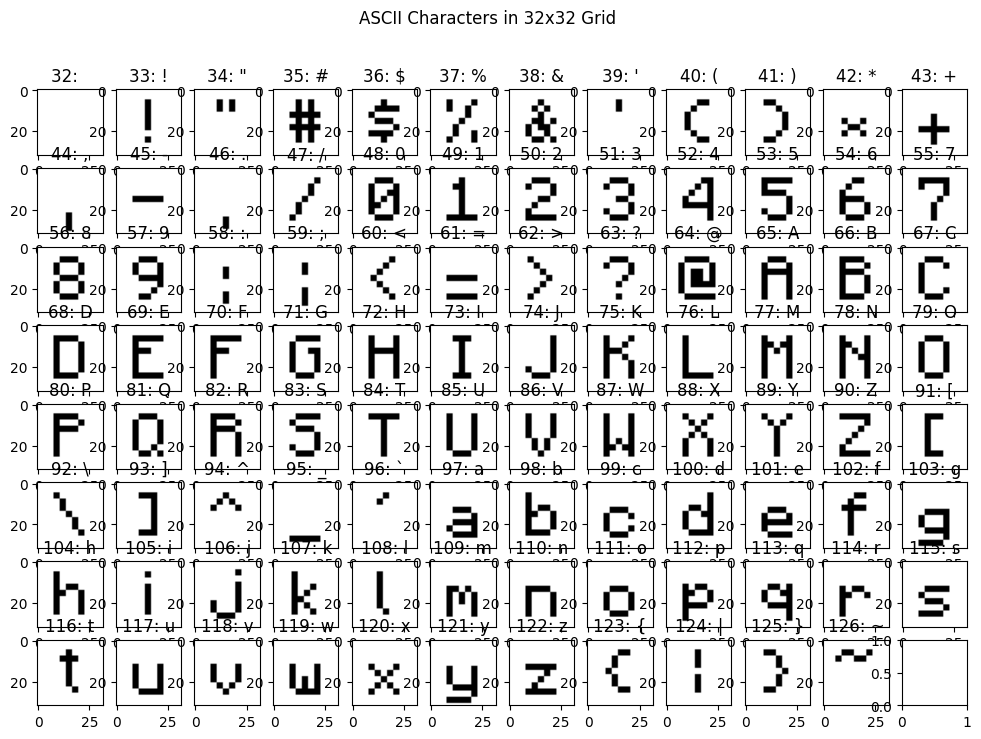

In [33]:
# Load the font
font_path = "images/minecraft_font.ttf"
font_size = 24
font = ImageFont.truetype(font_path, font_size)

# Create a new image for each character
char_images = []
for i in range(32, 127):  # ASCII characters from space (32) to tilde (126)
    char = chr(i)
    char_image = Image.new("RGB", (32, 32), "white")
    char_draw = ImageDraw.Draw(char_image)
    bbox = char_draw.textbbox((0, 0), char, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    text_x = (32 - text_width) // 2
    text_y = (32 - text_height) // 2

    # Draw Text
    x_offset = 1
    y_offset = -15 if char in "-_" else -10 if char in ",." else \
        -8 if char in "acemnopqrsuvwxz+" else -6
    char_draw.text((text_x + x_offset, text_y + y_offset), char, font=font, fill="black")
    char_images.append(char_image)

# Plot all character images using matplotlib
fig, axes = plt.subplots(8, 12, figsize=(12, 8))
i = 32
for ax, char_image in zip(axes.flatten(), char_images):
    ax.imshow(char_image)
    ax.set_title(f"{i}: {chr(i)}")
    i += 1

plt.suptitle("ASCII Characters in 32x32 Grid")
plt.show()

In [37]:
def get_rom(im: Image.Image):
    bytes = "0b"

    im_data = np.array(im)

    for row in im_data:
        for pixel in row:
            r, g, b = pixel
            if r >= 128 and g >= 128 and b >= 128:
                bytes += "0"
            else:
                bytes += "1"

    data_int = int(bytes, 2)
    hexadec = f"{data_int:0256X}"
    assert(len(hexadec) == 256)
    
    return hexadec

mem_content = ""
i = 32

for im in char_images:
    mem_content += get_rom(im) + "\n"
    i += 1

# Write mem_content to font.mem
with open("font.mem", "w") as f:
    f.write(mem_content)